# forward modeling photometry

In [1]:
import os,sys
import numpy as np

In [4]:
from speclite import filters as specFilter

In [3]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [5]:
# set up photometric filters u, g, r, i, z, J
sdss_u = specFilter.load_filter('sdss2010-u')
sdss_g = specFilter.load_filter('sdss2010-g')
sdss_r = specFilter.load_filter('sdss2010-r')
sdss_i = specFilter.load_filter('sdss2010-i')
sdss_z = specFilter.load_filter('sdss2010-z')
hsc_y = specFilter.load_filter('hsc2017-y')

bandpasses = specFilter.FilterSequence([sdss_u, sdss_g, sdss_r, sdss_i, sdss_z, hsc_y])

In [6]:
waves = np.load('/pscratch/sd/c/chahah/sedflow/seds/train_sed.modela.0.waves.npz')['arr_0']
seds = np.load('/pscratch/sd/c/chahah/sedflow/seds/train_sed.modela.0.seds.npz')['arr_0']

(0.0, 0.36079014715944524)

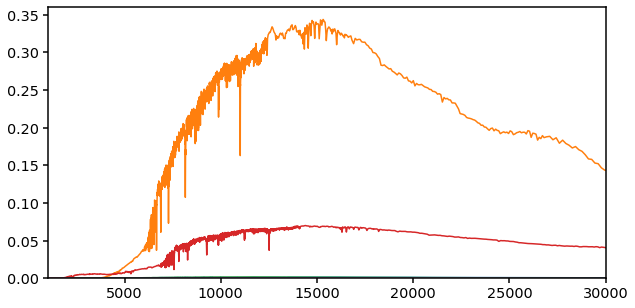

In [8]:
fig = plt.figure(figsize=(10, 5))
sub = fig.add_subplot(111)
for i in 100*np.arange(5): 
    sub.plot(waves[i], seds[i])
sub.set_xlim(1e3, 3e4)
sub.set_ylim(0, None)

In [9]:
fl = seds / (3.34e4) / waves**2 # ergs/s/cm^2/A

In [13]:
maggies = np.empty((fl.shape[0], len(bandpasses.effective_wavelengths)))

for i in range(fl.shape[0]): 
    maggies[i,:] = np.array([np.array(list(arr)) 
                                    for arr in bandpasses.get_ab_maggies(fl[i], wavelength=waves[i]).as_array()]) * 1e9

(0.0, 0.05)

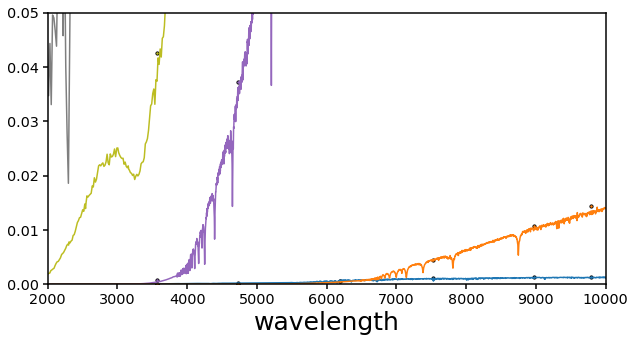

In [19]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in 7*np.arange(5): 
    sub.plot(waves[i], seds[i], c='C%i' % i)
    sub.scatter(bandpasses.effective_wavelengths, maggies[i]/2.5e5, c='k', s=10)
    sub.scatter(bandpasses.effective_wavelengths, maggies[i]/2.5e5, c='C%i' % i, s=2)

sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(2e3, 1e4)
sub.set_ylim(0., 0.05)

In [46]:
nmgy = np.load('/pscratch/sd/c/chahah/sedflow/seds/train_sed.modela.0.nmgy_ugrizJ.npy')

(0.0, 6.627022405099625)

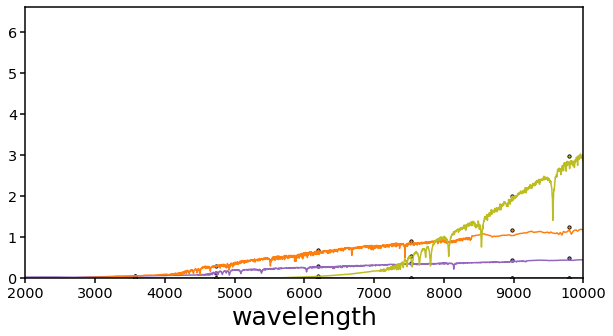

In [47]:
fig = plt.figure(figsize=(10,5))

sub = fig.add_subplot(111)
for i in 187*np.arange(5): 
    sub.plot(waves[i], seds[i], c='C%i' % i)
    sub.scatter(bandpasses.effective_wavelengths, _maggies[i]/2.5e5, c='k', s=10)
    sub.scatter(bandpasses.effective_wavelengths, _maggies[i]/2.5e5, c='C%i' % i, s=2)

sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(2e3, 1e4)
sub.set_ylim(0., None)